In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("University_Clustering.xlsx")

print(df)

            Univ State   SAT  Top10  Accept  SFRatio  Expenses  GradRate
0          Brown    RI  1310     89      22       13     22704        94
1        CalTech    CA  1415    100      25        6     63575        81
2            CMU    PA  1260     62      59        9     25026        72
3       Columbia    NY  1310     76      24       12     31510        88
4        Cornell    NY  1280     83      33       13     21864        90
5      Dartmouth    NH  1340     89      23       10     32162        95
6           Duke    NC  1315     90      30       12     31585        95
7     Georgetown    DC  1255     74      24       12     20126        92
8        Harvard    MA  1400     91      14       11     39525        97
9   JohnsHopkins    MD  1305     75      44        7     58691        87
10           MIT    MA  1380     94      30       10     34870        91
11  Northwestern    IL  1260     85      39       11     28052        89
12     NotreDame    IN  1255     81      42       1

In [3]:
df.drop("State",axis=1, inplace=True)
df_new = df.drop("Univ", axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler
for col in df_new:
    ss = StandardScaler()
    df_new[col]= ss.fit_transform(df_new[[col]])

In [5]:
df_new.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [6]:
# final model
model = KMeans(n_clusters=3)
model.fit(df_new)

KMeans(n_clusters=3)

In [7]:
df["labels"] = model.labels_
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,2


In [10]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=3,random_state=1)
components = pca.fit_transform(df_new)

In [17]:
components

array([[-1.00987445, -1.06430962,  0.08106631],
       [-2.82223781,  2.25904458,  0.83682883],
       [ 1.11246577,  1.63120889, -0.26678684],
       [-0.74174122, -0.04218747,  0.06050086],
       [-0.31191206, -0.63524357,  0.01024052],
       [-1.69669089, -0.34436328, -0.25340751],
       [-1.24682093, -0.49098366, -0.03209382],
       [-0.33874978, -0.78516859, -0.49358483],
       [-2.37415013, -0.38653888,  0.11609839],
       [-1.40327739,  2.11951503, -0.44282714],
       [-1.72610332,  0.08823712,  0.17040366],
       [-0.45085748, -0.01113295, -0.17574605],
       [ 0.04023814, -1.00920438, -0.49651717],
       [ 3.23373034, -0.37458049, -0.49537282],
       [-2.23626502, -0.37179329, -0.39899365],
       [ 5.17299212,  0.77991535, -0.38591233],
       [-1.69964377, -0.30559745,  0.31850785],
       [ 4.578146  , -0.34759136,  1.49964176],
       [ 0.82260312, -0.69890615,  1.42781145],
       [-0.09776213,  0.65044645,  0.10050844],
       [ 1.9631826 , -0.22476756, -0.255

In [18]:
pc1 = components[:,0]
pc2 = components[:,1]
pc3 = components[:,2]

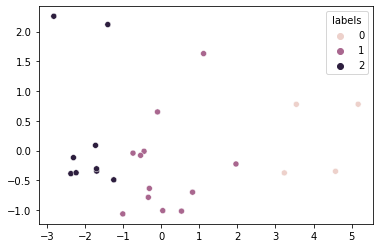

In [30]:
plt.figure()
sns.scatterplot(pc1,pc2,hue=df["labels"])
plt.show()

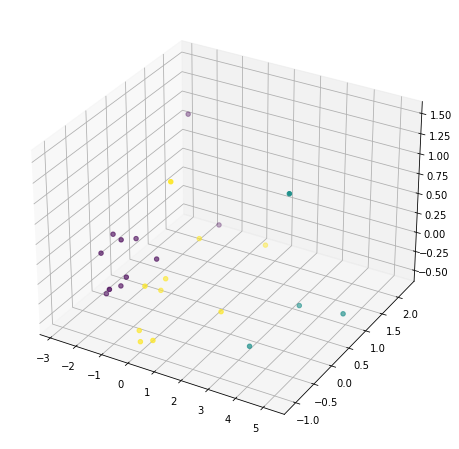

In [26]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection ='3d')
ax.scatter(pc1,pc2,pc3,c=df["labels"])
plt.show()